In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from pathlib import Path
import os

In [3]:
path_splits = '../splits/100_shot_split.csv'
path_jpg = Path('../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files/')

df = pd.read_csv(path_splits)
data = ImageList.from_df(df, path_jpg)
data

ImageList (44061 items)
Image (3, 2705, 2539),Image (3, 2906, 2258),Image (3, 3056, 2544),Image (3, 2544, 3056),Image (3, 3056, 2544)
Path: ../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files

In [4]:
train_idx = df.index[df['split']=='train']
valid_idx = df.index[df['split']=='validate']

tfms = None
size = 448 #224

data = (ImageList.from_df(df, path_jpg)
        .split_by_idxs(train_idx, valid_idx)
        .label_from_df(cols='labels')
        .transform(tfms=tfms, size=size, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=16)
        .normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (1300 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Pleural Effusion,No Finding,Support Devices,Atelectasis,Pneumonia
Path: ../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files;

Valid: LabelList (3900 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Consolidation,Pneumonia,Pleural Effusion,Cardiomegaly,Pneumothorax
Path: ../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files;

Test: None

In [5]:
arch = models.densenet121
#arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[error_rate, accuracy], callback_fns=[CSVLogger])

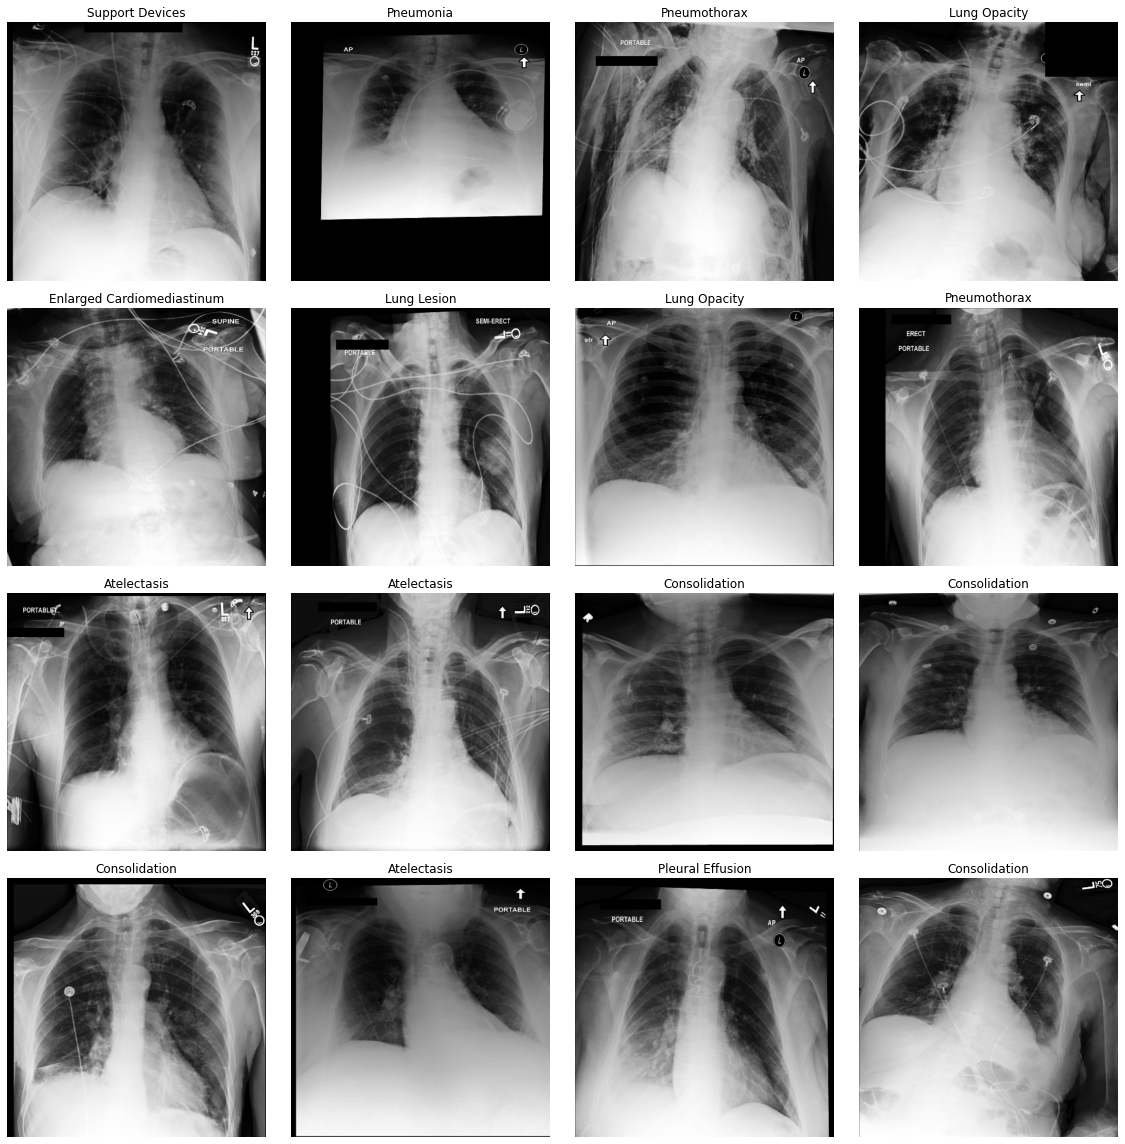

In [10]:
data.show_batch()
#learn.lr_find()
#learn.recorder.plot()

In [7]:
#lr = 1e-3
#learn.fit_one_cycle(2, slice(lr))
learn.fit_one_cycle(6)

epoch     train_loss  valid_loss  error_rate  accuracy  time    
0         3.856391    3.073144    0.877436    0.122564  03:31     
1         3.156277    3.351298    0.872308    0.127692  03:06     
2         2.196412    3.162264    0.860513    0.139487  03:06     
3         1.447580    3.288349    0.851282    0.148718  03:06     
4         0.930736    3.213727    0.849231    0.150769  03:06     
5         0.588325    3.252570    0.848974    0.151026  03:06     


In [9]:
learn.fit_one_cycle(6)

epoch     train_loss  valid_loss  error_rate  accuracy  time    
0         0.598433    3.360506    0.849231    0.150769  03:06     
1         1.018453    3.956577    0.864872    0.135128  03:06     
2         1.102981    3.885739    0.860769    0.139231  03:06     
3         0.710509    3.901404    0.858462    0.141538  03:07     
4         0.418362    3.856656    0.853846    0.146154  03:06     
5         0.284287    3.877346    0.852308    0.147692  03:06     


Int64Index([    3,    18,    27,    34,    39,    49,    53,    57,    75,
               82,
            ...
            43998, 44001, 44009, 44017, 44021, 44027, 44028, 44037, 44043,
            44050],
           dtype='int64', length=3900)